## Fundamentals of Data Analysis Project Submission 2018
#### Foreword
The analysis of the [Boxplot](https://en.wikipedia.org/wiki/Box_plot) visual analysis tool contained in this Jupyter Notebook is the project submission for the 2nd semester 5 credit module - **Fundamentals of Data Analysis**, part of the course entitled **Higher Diploma in Science - Computing(Data Analytics)**, submitted to Dr. Ian McLoughlin, Lecturer and Programme Director at GMIT.<br>

Submitted by Justin Rutherford<br>
December 2018.


#### Problem Statement
*The box plot is common in data analysis for investigating individual numerical variables.
In this project, you will investigate and explain box plots and their uses. The boxplot
function from the Python package matplotlib.pyplot can be used to create box plots.
Your submission should be in the form of a repository containing a Jupyter notebook in
which you detail your findings. In your notebook, you should:<br>
• Summarise the history of the box plot and situations in which it used.<br>
• Demonstrate the use of the box plot using data of your choosing.<br>
• Explain any relevant terminology such as the terms quartile and percentile.<br>
• Compare the box plot to alternatives.*



#### Methodology to address Problem Statement
We will first explain the background, use and function of the boxplot and relevant terminology.  To demonstrate the use of the boxplot we conduct an analysis of a pubically available dataset on weather from a local meteorological satation.  For the purpose of this assignment we will attempt to answer the following question;<br>
**Can we detect an increase in local temperature recordings over the past decade that is consistent with the [IPCC](https://www.ipcc.ch/) report that the global increase in mean annual temperature has reached 1 degree Celsius?<sup>[Ref](https://www.devex.com/news/new-ipcc-report-provides-evidence-base-for-a-1-5-degree-global-climate-target-93601)</sup>**
![1_degree_.GIF](Images/1_degree_.GIF)

#### The Boxplot
To begin we will explain what a box plot is;
A Boxplot, as know as a Box-and-Whisker plot, is a graph drawn from numerical data contained in a dataset. Box plots provide a visualisation tool of the summary data statistics using quartiles.  Quartiles split the dataset into four equal groups based on five key values: minimum, 1st quartile, median, 3rd quartile, and maximum. 
![](http://www.physics.csbsju.edu/stats/simple.box.defs.gif)


The box portion of the plot illustrates the middle 50 percent of the data values, also known as the interquartile range, or IQR. The median of the values is depicted as a line splitting the box in half. The IQR illustrates the variability in a set of values. A large IQR indicates a large spread in values, while a smaller IQR indicates most values fall near the center. Box plots also illustrate the minimum and maximum data values through whiskers extending from the box, and optionally, outliers as points extending beyond the whiskers.<sup>[Ref](https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/box-plot.htm)</sup> 
    
Outliers (if any) are plotted as individual data points.  These are individual data points that are beyond the max or min values are could be considered as erroneous values, subject to further investigation.

The box-and-whisker plot is useful for revealing the central tendency and variability of a data set, the distribution (particularly symmetry or skewness) of the data, and the presence of outliers. It is also a powerful graphical technique for comparing samples from two or more different treatments or populations. It was invented in the 1970s by American statistician John Wilder Tukey.


### Investigation Methodology

To investigate this concept we will carry out the following work plan.
1. Set up our workspace (Jupyter Notebook, git hub repository, cloned to our local machine).
2. Find an appropriate data set containing temperature recordings over the past decade and download.
3. Import necessary python packages (Numpy, Matplotlib, Seaborn)
4. View the dataset, parse and extract the full set of target data.
5. Isolate the temperature dataset for each year and run analysis to confirm suitablility.
6. Use the boxplot to illustrate the dataset for each year of the analysis.
7. Compile a composite boxplot graphic for all of the years to visually compare the dataset variations.
8. Comment on the results and suitablity of the boxplot for this analysis.
9. Generate other graphics/ plots using the same dataset to see if a more comprehensive illustration can be achieved.
10. Summarise the results of the analysis.


### Summary of Results
We have conducted an analysis of the temperature dataset for the years 2009 - 2017 from a local meteorological station at Gurteen College, Co. Tipperary.  The purpose of this was to demonstate with the use of the **Boxplot** if it was possible to determine changes in mean annual temperature over the last 10 years.  We have found that the boxplot is not the optimum visualisation tool for this, as it lacks a high degree of granularity required to illustrate very subtle changes in temperature. .  Boxplots provide an excellent representation of the statistical summary of a dataset, and is particulary useful in visualising and comparing key data points such median, max, min, quartiles and potential outliers.  However, to answer our question on identifying a potential increase in mean annual temperature over a period, we have found that plotting the mean temperature data and generating a trendline provided the required result.  We looked at alternative to boxplots such as histograms, composite plots as part of this project.  

![Temp_comp_Tipp.GIF](Images/Temp_comp_Tipp.GIF)

### Workings of our analysis

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Let's have a look at the meteorological data from the Gurteen met station in Tipperary
df = pd.read_csv("http://cli.met.ie/cli/climate_data/webdata/hly1475.csv", skiprows=17,skip_blank_lines=True, low_memory=False, usecols = [0,4])
df.shape
df.head(2)

,date,temp
0,31-dec-2007 01:00,
1,31-dec-2007 02:00,


In [3]:
df.tail(2)

,date,temp
94270,31-oct-2018 23:00,2.2
94271,01-nov-2018 00:00,1.7


In [4]:
df.dtypes

date    object
temp    object
dtype: object

In [5]:
#Checking for data issues (empty cells) as follows;
df.isnull().sum()

date    0
temp    0
dtype: int64

In [6]:
#We are only interested in the date and temperature columns, however they are returned as 'object' type data, so we must convert to relevant data form.
#First we will look at the date to datetime conversion, and then the temperature to a numeric conversion.
df['Datetime'] = pd.to_datetime(df['date'])
df['Temp'] = pd.to_numeric(df['temp'], errors='coerce')# Important to convert objects to numbers, but this creates another issue regarding 'NaN' cells.
df.head(2)

,date,temp,Datetime,Temp
0,31-dec-2007 01:00,,2007-12-31 01:00:00,NaN
1,31-dec-2007 02:00,,2007-12-31 02:00:00,NaN


In [7]:
#Let's check our cells for any missing data issues!
df.isnull().sum()

date          0
temp          0
Datetime      0
Temp        253
dtype: int64

In [8]:
#To call for some summary statistics use;
df.describe()

,Temp
count,94019.000000
mean,9.597338
std,5.281526
min,-13.400000
25%,6.000000
50%,9.900000
75%,13.400000
max,29.700000


In [9]:
#The new column 'Temp' which is now numeric (dtype Int64) contains NaN cells.
#Ok, so we now know (after some extensive testing and research) that we can't plot with 'NaN' cells.  So to deal with this we will insert the average value from the dataset into the 'NaN' data cells  
df.fillna(9.6, inplace=True)

In [10]:
df.isnull().sum()

date        0
temp        0
Datetime    0
Temp        0
dtype: int64

In [11]:
#Now rearrange the columns so that we have Datetime first and eliminate unnecessary noise;
df = df[['Datetime', 'Temp']]
df.head(1)

,Datetime,Temp
0,2007-12-31 01:00:00,9.6


In [12]:
df.tail(2)

,Datetime,Temp
94270,2018-10-31 23:00:00,2.2
94271,2018-11-01 00:00:00,1.7


In [13]:
df.describe()

,Temp
count,94272.000000
mean,9.597345
std,5.274434
min,-13.400000
25%,6.000000
50%,9.800000
75%,13.400000
max,29.700000


In [14]:
#Select the data range from the 1st year of the dataset;
df1 = df.loc[8087:16847]

In [15]:
#To check the correct starting time for our analysis use;
df1.head(2)

,Datetime,Temp
8087,2009-01-01 00:00:00,3.2
8088,2009-01-01 01:00:00,3.1


In [16]:
#To check the ending time for our analysis;
df1.tail(2)

,Datetime,Temp
16846,2009-12-31 23:00:00,-3.9
16847,2010-01-01 00:00:00,-2.4


In [17]:
#To summarise the metadata we use the following;
df1.describe()

,Temp
count,8761.000000
mean,9.439345
std,5.242226
min,-7.100000
25%,6.000000
50%,9.700000
75%,13.300000
max,25.900000


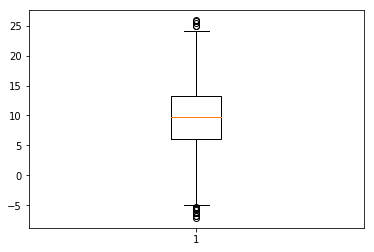

In [18]:
#To visualise the data we use a box plotas follows;
A = plt.boxplot(df1['Temp'])

In [19]:
#Now we will need to look at the data from the next year of our analysis.
#Select the data range from the 2nd year of the dataset;
df2 = df.iloc[16847:25607]

In [20]:
df2.describe()

,Temp
count,8760.000000
mean,8.312032
std,6.609363
min,-13.400000
25%,3.700000
50%,9.000000
75%,13.400000
max,24.500000


In [21]:
df2.head(2)

,Datetime,Temp
16847,2010-01-01 00:00:00,-2.4
16848,2010-01-01 01:00:00,-2.4


In [22]:
df2.tail(1)

,Datetime,Temp
25606,2010-12-31 23:00:00,4.8


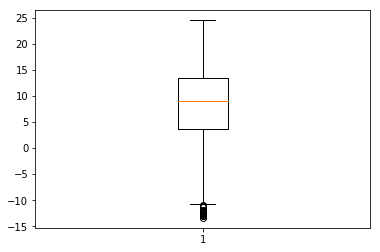

In [23]:
B = plt.boxplot(df2['Temp'])

In [24]:
df3 = df.iloc[25607:34367]
df3.head(2)

,Datetime,Temp
25607,2011-01-01 00:00:00,5.0
25608,2011-01-01 01:00:00,4.8


In [25]:
df3.tail(1)


,Datetime,Temp
34366,2011-12-31 23:00:00,9.0


In [26]:
df3.describe()

,Temp
count,8760.000000
mean,9.718858
std,4.681199
min,-6.100000
25%,6.900000
50%,10.400000
75%,13.000000
max,23.500000


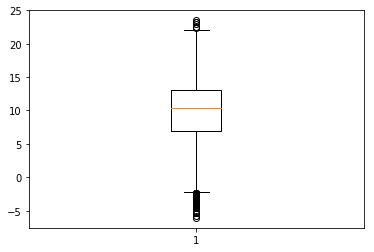

In [27]:
C = plt.boxplot(df3['Temp'])

In [28]:
df4 = df.iloc[34367:43151]
df4.head(2)

,Datetime,Temp
34367,2012-01-01 00:00:00,8.8
34368,2012-01-01 01:00:00,8.6


In [29]:
df4.tail(2)

,Datetime,Temp
43149,2012-12-31 22:00:00,3.5
43150,2012-12-31 23:00:00,3.1


In [30]:
df4.describe()


,Temp
count,8784.000000
mean,9.464526
std,4.649455
min,-4.100000
25%,6.300000
50%,9.400000
75%,12.500000
max,24.500000


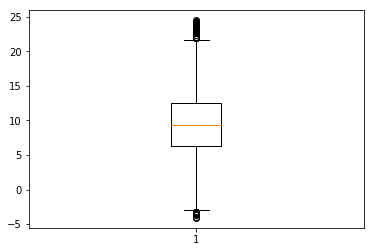

In [31]:
D = plt.boxplot(df4['Temp'])

In [32]:
df5 = df.iloc[43151:51911]
df5.head(2)

,Datetime,Temp
43151,2013-01-01 00:00:00,3.3
43152,2013-01-01 01:00:00,3.5


In [33]:
df5.tail(2)

,Datetime,Temp
51909,2013-12-31 22:00:00,4.6
51910,2013-12-31 23:00:00,4.2


In [34]:
df5.describe()

,Temp
count,8760.000000
mean,9.490251
std,5.696650
min,-6.300000
25%,5.400000
50%,9.400000
75%,13.525000
max,28.400000


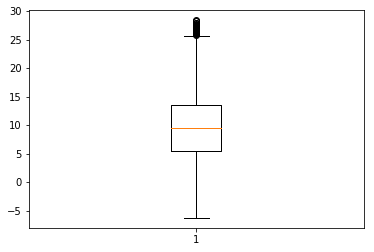

In [35]:
E = plt.boxplot(df5['Temp'])

In [36]:
df6 = df.iloc[51911:60671]
df6.head(2)

,Datetime,Temp
51911,2014-01-01 00:00:00,4.0
51912,2014-01-01 01:00:00,3.8


In [37]:
df6.tail(2)

,Datetime,Temp
60669,2014-12-31 22:00:00,8.7
60670,2014-12-31 23:00:00,8.9


In [38]:
df.describe()

,Temp
count,94272.000000
mean,9.597345
std,5.274434
min,-13.400000
25%,6.000000
50%,9.800000
75%,13.400000
max,29.700000


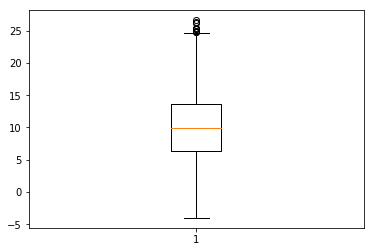

In [39]:
F = plt.boxplot(df6['Temp'])

In [40]:
df7 = df.iloc[60671:69431]
df7.head(2)

,Datetime,Temp
60671,2015-01-01 00:00:00,8.7
60672,2015-01-01 01:00:00,8.7


In [41]:
df7.tail(2)

,Datetime,Temp
69429,2015-12-31 22:00:00,1.1
69430,2015-12-31 23:00:00,-0.5


In [42]:
df7.describe()

,Temp
count,8760.000000
mean,9.419041
std,4.630852
min,-5.900000
25%,6.100000
50%,9.800000
75%,12.800000
max,22.800000


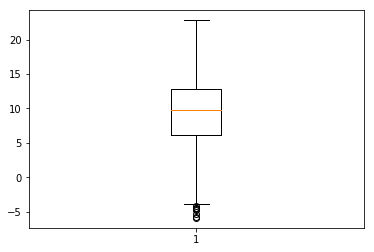

In [43]:
G = plt.boxplot(df7['Temp'])

In [44]:
df8 = df.iloc[69431:78215]
df8.head(2)

,Datetime,Temp
69431,2016-01-01 00:00:00,1.3
69432,2016-01-01 01:00:00,2.1


In [45]:
df8.tail(2)

,Datetime,Temp
78213,2016-12-31 22:00:00,7.4
78214,2016-12-31 23:00:00,5.7


In [46]:
df8.describe()

,Temp
count,8784.000000
mean,9.642771
std,5.264676
min,-5.400000
25%,5.700000
50%,9.700000
75%,13.600000
max,27.200000


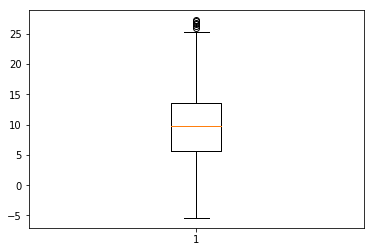

In [47]:
H = plt.boxplot(df8['Temp'])

In [48]:
df9 = df.iloc[78215:86951]
df9.head(2)

,Datetime,Temp
78215,2017-01-01 00:00:00,5.4
78216,2017-01-01 01:00:00,5.1


In [49]:
df9.tail(2)

,Datetime,Temp
86949,2017-12-30 22:00:00,7.8
86950,2017-12-30 23:00:00,10.0


In [50]:
df9.describe()

,Temp
count,8736.000000
mean,10.044792
std,4.793516
min,-6.000000
25%,6.900000
50%,10.500000
75%,13.400000
max,24.500000


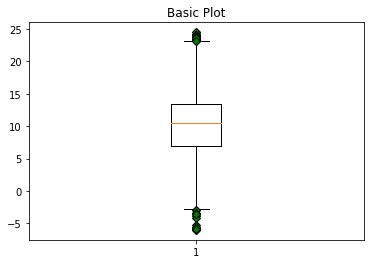

In [51]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1,ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df9['Temp'],flierprops = green_diamond);

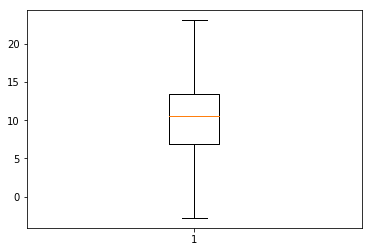

In [52]:

I = plt.boxplot(df9['Temp'], showfliers = False)


In [53]:
datasets = [(df1['Temp']),(df2['Temp']),(df3['Temp']),(df4['Temp']),(df5['Temp']),(df6['Temp']),(df7['Temp']),(df8['Temp']),(df9['Temp'])]

Text(0.5,1,'Boxplot comparision of annual hourly temperatures in Tipperary')

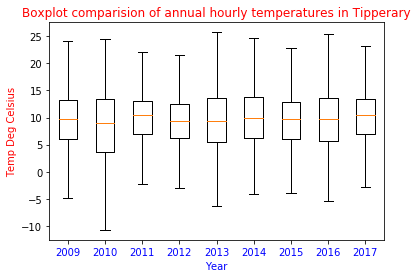

In [54]:
plt.boxplot(datasets,0, showfliers=False); #use semi-colon after the function to eliminate unnecessary code outputs
plt.xticks([1, 2, 3,4,5,6,7,8,9], ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], color='b');
plt.ylabel('Temp Deg Celsius',color='r')
plt.xlabel("Year", color='b')
plt.title("Boxplot comparision of annual hourly temperatures in Tipperary", fontdict=None, loc='center', color = 'r')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Histogram of recorded temperatures 2009-2017')

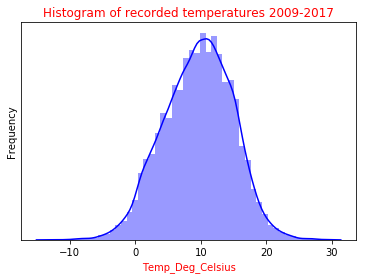

In [55]:
import seaborn as sb
sb.distplot(df['Temp'], bins=50, color='b', axlabel ='Temp Deg Celsius');
plt.xlabel('Temp_Deg_Celsius', color='r')
plt.ylabel('Frequency')
plt.yticks([])
plt.title('Histogram of recorded temperatures 2009-2017', color='r')

Text(0,0.5,'Temp Deg Celsius')

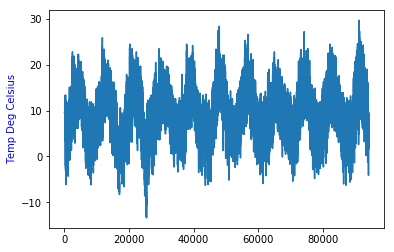

In [56]:
plt.plot(df['Temp']);
plt.ylabel('Temp Deg Celsius',color='b')

Text(0.5,1,'Annual Hourly Temperature Range for Tipperary')

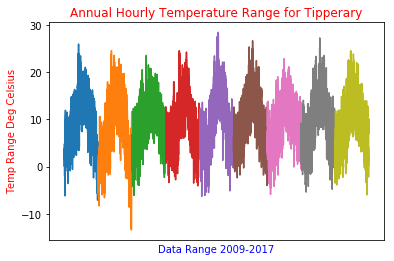

In [57]:
import matplotlib.axes as ax
plt.plot(df1['Temp']);
plt.plot(df2['Temp']);
plt.plot(df3['Temp']);
plt.plot(df4['Temp']);
plt.plot(df5['Temp']);
plt.plot(df6['Temp']);
plt.plot(df7['Temp']);
plt.plot(df8['Temp']);
plt.plot(df9['Temp']);
plt.ylabel('Temp Range Deg Celsius',color='r')
plt.xticks([])
plt.xlabel('Data Range 2009-2017', color='b')
plt.title('Annual Hourly Temperature Range for Tipperary', color='r')


In [58]:
df9.mean()

Temp    10.044792
dtype: float64

In [59]:
means = [9.4, 8.3, 9.7, 9.4, 9.4, 10.0, 9.4, 9.6, 10]

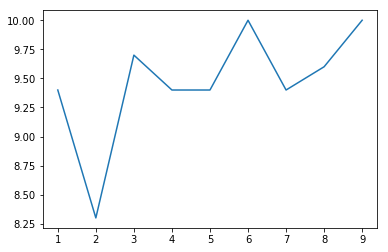

In [60]:

x = [1, 2, 3,4,5,6,7,8,9]
y = [9.4, 8.3, 9.7, 9.4, 9.4, 10.0, 9.4, 9.6, 10]
plt.plot(x,y);

In [61]:
np.polyfit(x,y,1)

array([0.105     , 8.94166667])

In [62]:
#Ployfit can't work with non-integer type of lists, so we change our list to an array as follows;
x1 = np.asarray(x)
x1

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [63]:
y1 = np.asarray(y)
y1

array([ 9.4,  8.3,  9.7,  9.4,  9.4, 10. ,  9.4,  9.6, 10. ])

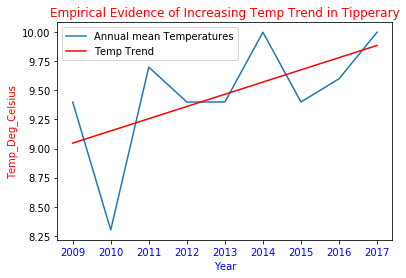

In [64]:
m = 0.105
c = 8.94166667
plt.plot(x1,y1,label='Annual mean Temperatures')
plt.plot(x1,m*x1+c, 'r-', label = 'Temp Trend')
plt.xlabel("Year", color='b')
plt.ylabel("Temp_Deg_Celsius", color = 'r')
plt.xticks([1, 2, 3,4,5,6,7,8,9], ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], color='b');
plt.title("Empirical Evidence of Increasing Temp Trend in Tipperary", fontdict=None, loc='center', color = 'r')
plt.legend()
plt.show()

References listed below that were used in the production of this Jupyter Notebook.

http://vita.had.co.nz/papers/boxplots.pdf

https://www.iflscience.com/environment/global-temperature-increase-1-degree-caused-sea-level-rises-6-meters/

https://climateanalytics.org/briefings/global-warming-reaches-1c-above-preindustrial-warmest-in-more-than-11000-years/

https://www.britannica.com/science/box-and-whisker-plot

https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/box-plot.htm

https://en.wikipedia.org/wiki/Box_plot

